In [1]:
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import cufflinks as cf
from functools import reduce

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data

df_city = pd.read_csv(city_data)
df_city.head()
# Display the data table for preview


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
df_ride = pd.read_csv(ride_data)
df_ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset

dfs = [df_ride, df_city]
df_merged = reduce(lambda left,right: pd.merge(left,right,on='city', how='outer'), dfs)
df_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

In [4]:
#Obtain the x and y coordinates for each of the three city types

df_merged["counter"] = 1 #create a ride counter

scrapped_city = df_merged.drop_duplicates('city') #this will drop duplicate values in the "city" column
scrapped_city.dtypes
city_drivers = scrapped_city.set_index('city',inplace=True) #the line ('city',"inplace=True") will help us move the column "city" towards the index of the file.

#Now let's create new variables to store the sliced data which corresponds only to each (Urban, Suburban and Rural) sector with the .loc function. 

urban = df_merged.loc[(df_merged["type"] == "Urban")]
suburban = df_merged.loc[(df_merged["type"] == "Suburban")]
rural = df_merged.loc[(df_merged["type"] == "Rural")]

#Now let's group those values per city, so we can use them as a joined set of data later on:

urban_city = urban.groupby('city')
suburban_city = suburban.groupby('city')
rural_city = rural.groupby('city')


#Now Let's run the proper calculations and create a counter to see how many rides there are per city:

urban_rides = urban_city["counter"].sum()
suburban_rides = suburban_city["counter"].sum()
rural_rides = rural_city["counter"].sum()

#Now Let's find out what the average fare per city is:

urban_avg = urban_city["fare"].mean()
suburban_avg = suburban_city["fare"].mean()
rural_avg = rural_city["fare"].mean()

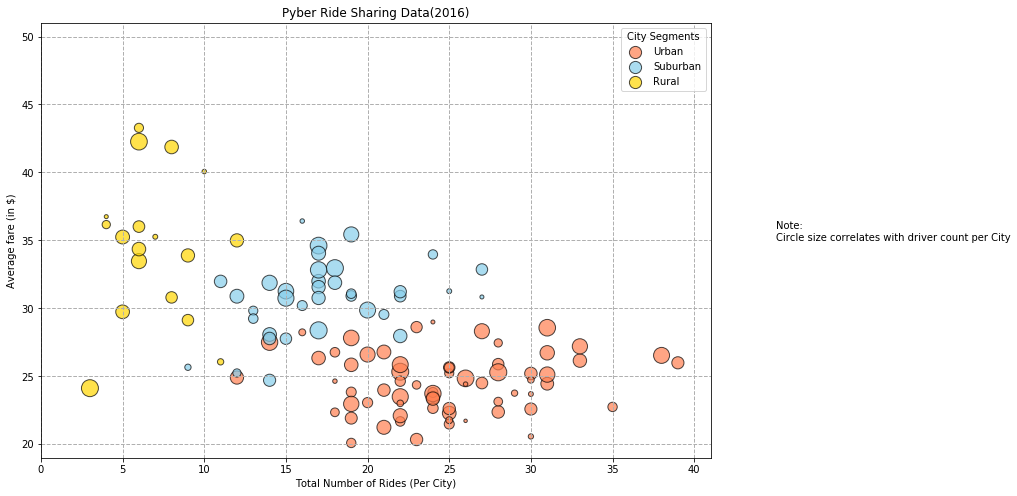

In [5]:

#Now let's create a scatter plot for each type of city in the dataset (rural, urban, suburban).

fig, ax = plt.subplots(figsize=(12,8))

#1) 
plt.scatter(urban_rides, urban_avg, marker="o", facecolors="coral", edgecolors="black", s=scrapped_city["driver_count"]*4, alpha=0.7, label="Urban")
#2)
plt.scatter(suburban_rides, suburban_avg, marker ="o", facecolors="skyblue", edgecolors="black", s=scrapped_city["driver_count"]*4, alpha=0.7, label="Suburban")
#3)
plt.scatter(rural_rides, rural_avg, marker ="o", facecolors="gold", edgecolors="black", s=scrapped_city["driver_count"]*4, alpha=0.7, label="Rural")


#Let's now incorporate the remaining graph elements:

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlim(0,41)
plt.ylim(19,51)
ax.grid(linestyle='--', linewidth='1',)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average fare (in $)')

#Now... let's give it a legend!

plt.legend(loc="best", title="City Segments",fancybox=True)

#Let's add a note like requested in the exercise:
plt.text(45,35, 'Note:\nCircle size correlates with driver count per City')

#To save our figure:
plt.savefig('PyberScatter.png')
plt.show()

## Total Fares by City Type

In [6]:
# Calculate Type Percentages
city_segment = df_merged.groupby('type')
city_segment.head()


,city,date,fare,ride_id,driver_count,type,counter
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,1
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,1
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,1
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,1
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,1
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban,1
1626,Barronchester,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban,1
1627,Barronchester,2018-04-25 19:11:43,36.13,2660177707065,11,Suburban,1
1628,Barronchester,2018-03-31 06:05:30,44.24,1252888806772,11,Suburban,1
1629,Barronchester,2018-03-02 23:36:58,36.49,4031573980778,11,Suburban,1


In [7]:
# Calculate Total Fares in city segment:
total_fares = df_merged['fare'].sum()
type_fares= 100*(city_segment["fare"].sum()/total_fares)
type_fares.head()

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [8]:
values = type_fares.values.tolist()
labels = type_fares.index.tolist()
labels
colors = ['gold','lightskyblue','lightcoral']
explode = (0 , 0 , 0.1)


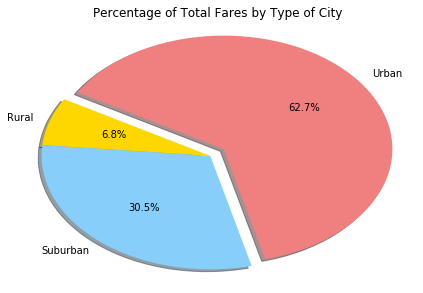

In [9]:
# Build Pie Chart: Now let's graph our results once the characteristics have been indicated:

plt.figure(figsize=(6,4))
plt.pie(values, labels=labels, colors=colors, startangle= 150, autopct='%.1f%%', explode=explode, shadow=True)
plt.axis('auto')

plt.tight_layout()
plt.title("Percentage of Total Fares by Type of City")
# Save Figure
plt.savefig("PieFares.png")
# Show graph
plt.show()

## Total Rides by City Type

In [10]:
# Calculate Ride Percentages
total_rides = df_merged['counter'].sum()
type_rides= 100*(city_segment['counter'].sum()/total_rides)
type_rides.head()

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: counter, dtype: float64

In [11]:
#Assign values to enable chart:

values_f = type_rides.values.tolist()
labels_f = type_rides.index.tolist()

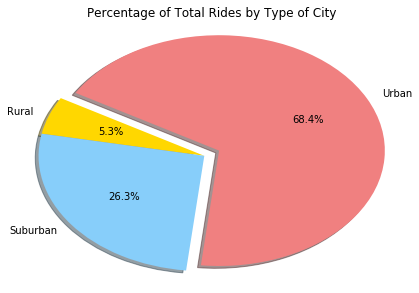

In [12]:
# Build Pie Chart

plt.figure(figsize=(6,4))
plt.pie(values_f, labels=labels_f, colors=colors, startangle= 150, autopct='%.1f%%', explode=explode, shadow=True)
plt.axis('auto')

plt.tight_layout()
plt.title("Percentage of Total Rides by Type of City")
# Save Figure
plt.savefig('PieRides.png')

# Total Drivers by City Type

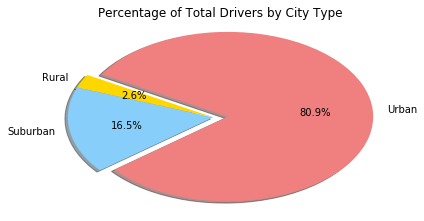

In [13]:
# Calculate Driver Percentages
city_drivers = df_merged.drop_duplicates('city')


total_drivers = df_merged['driver_count'].sum()
city_drivers = city_drivers.groupby('type')
driver_type=city_drivers["driver_count"].sum()
driver_type = 100*(city_drivers['driver_count'].sum()/total_rides)
driver_type

#Now let's build the chart!
values_dr = driver_type.values.tolist()
labels_dr = driver_type.index.tolist()

plt.figure(figsize=(6,3))
plt.pie(values_dr, labels=labels_dr, colors=colors, startangle=150,  autopct='%.1f%%', explode=explode, shadow=True)
plt.axis('auto')
plt.tight_layout()
plt.title('Percentage of Total Drivers by City Type')


# Save Figure
plt.savefig('PieTotalDrivers.png')

# Show Figure
plt.show()

# WRITTEN DESCRIPTION OF THE DATA:

1) The most notorious trend is that there are way more rides and drivers in urban areas, which is to be expected for a car sharing service. 

2) However, one thing that is not so obvious is that the average price of the fare increases as drivers and passengers go into more suburban or rural areas (which is also to be expected due to supply and demand factors). The most competition is seen in the urban and suburban sectors, also showing the most competitive rates per ride. 

3) A final consideration which is worth noting, is also that rural drivers seem to be pretty cost-efficient per ride, they only account for 2.6% of all drivers in the platform, but they provide an astonishing 6.8% of all revenues through fares, which is quite astonishing compared to their busier counterparts in urban areas. Interesting point! 